# Sentiment Analysis

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string
from wordcloud import WordCloud
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import scipy as sp
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn_pandas import DataFrameMapper

In [4]:
df_train_data = pd.read_csv("train.tsv", sep="\t")
df_test_data = pd.read_csv("test.tsv", sep="\t")


# Data Analysis 
It is always better to go through the data first to know what its distribution. 

In [5]:
print("Total numbers of Phrases available: {}" .format(len(df_train_data)))
print('Percentage of Negataive reviews: {:.2f}%'.format((df_train_data['Sentiment'] == 0).mean()*100))
print('Percentage of Somewhat Negataive reviews: {:.2f}%'.format((df_train_data['Sentiment'] == 1).mean()*100))
print('Percentage of Neutral reviews: {:.2f}%'.format((df_train_data['Sentiment'] == 2).mean()*100))
print('Percentage of Somewhat Positive reviews: {:.2f}%'.format((df_train_data['Sentiment'] == 3).mean()*100))
print('Percentage of Positive reviews: {:.2f}%'.format((df_train_data['Sentiment'] == 4).mean()*100))

Total numbers of Phrases available: 156060
Percentage of Negataive reviews: 4.53%
Percentage of Somewhat Negataive reviews: 17.48%
Percentage of Neutral reviews: 50.99%
Percentage of Somewhat Positive reviews: 21.10%
Percentage of Positive reviews: 5.90%


This shows that though we have a large amount of data in our hands, the distribution is not equal and may need some extra work. Their is a strong bias with Neutral reviews and a very small amount of data of Negative/Positive reviews. 

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/arshdeepbhogal/anaconda3/lib/python3.7/si

Text(0, 0.5, 'Probability')

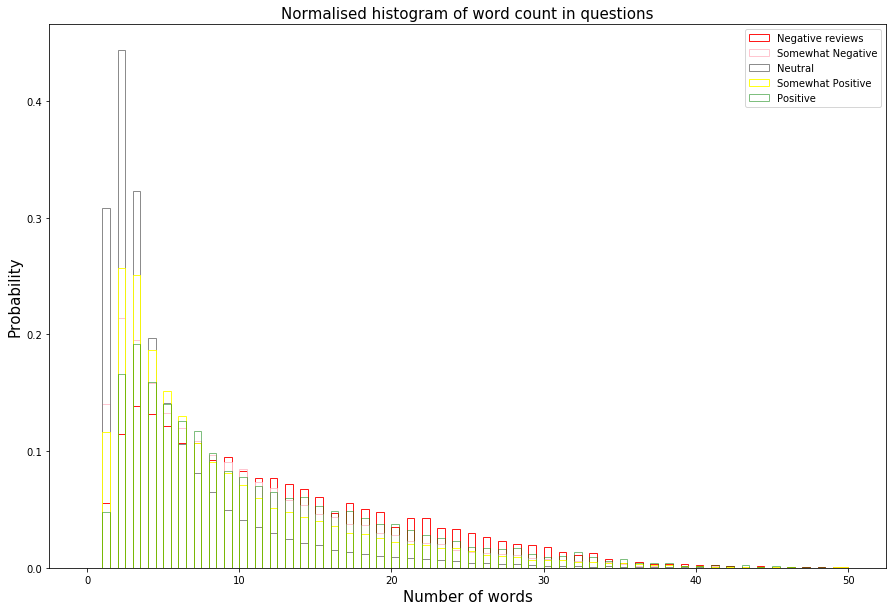

In [63]:
review4= (df_train_data[df_train_data['Sentiment'] == 4])
review3= (df_train_data[df_train_data['Sentiment'] == 3])
review2= (df_train_data[df_train_data['Sentiment'] == 2])
review1= (df_train_data[df_train_data['Sentiment'] == 1])
review0= (df_train_data[df_train_data['Sentiment'] == 0])

train0 = pd.Series(review0['Phrase']).apply(lambda x: len(x.split(' ')))
train1 = (review1['Phrase']).apply(lambda x: len(x.split(' ')))
train2 = (review2['Phrase']).apply(lambda x: len(x.split(' ')))
train3 = (review3['Phrase']).apply(lambda x: len(x.split(' ')))
train4 = (review4['Phrase']).apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train0, bins=100, range=[0, 50], color="red", normed=True, alpha=0.9, label='Negative reviews', histtype = 'step')
plt.hist(train1, bins=100, range=[0, 50], color="pink", normed=True, alpha=0.9, label='Somewhat Negative', histtype = 'step')
plt.hist(train2, bins=100, range=[0, 50],  color="grey",normed=True, alpha=0.9, label='Neutral', histtype = 'step')
plt.hist(train3, bins=100, range=[0, 50], color="yellow", normed=True, alpha=0.9, label='Somewhat Positive', histtype = 'step')
plt.hist(train4, bins=100, range=[0, 50], color="green", normed=True, alpha=0.5, label='Positive', histtype = 'step')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

Neutral reviews tend to be shorter and people like to write a slightly more when they had a bad experience.

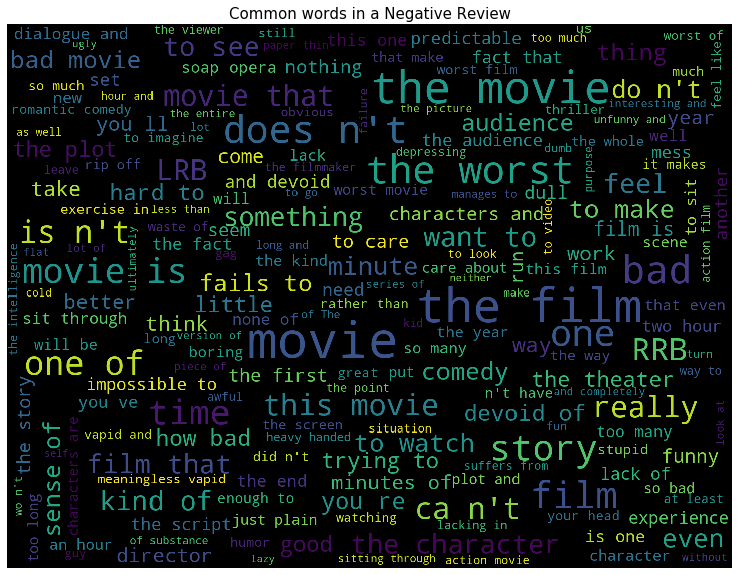

In [83]:
cloud = WordCloud(width=1440, height=1080, max_font_size=100).generate(" ".join(review0['Phrase'].astype(str)))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title("Common words in a Negative Review", fontsize = 15)
plt.show()

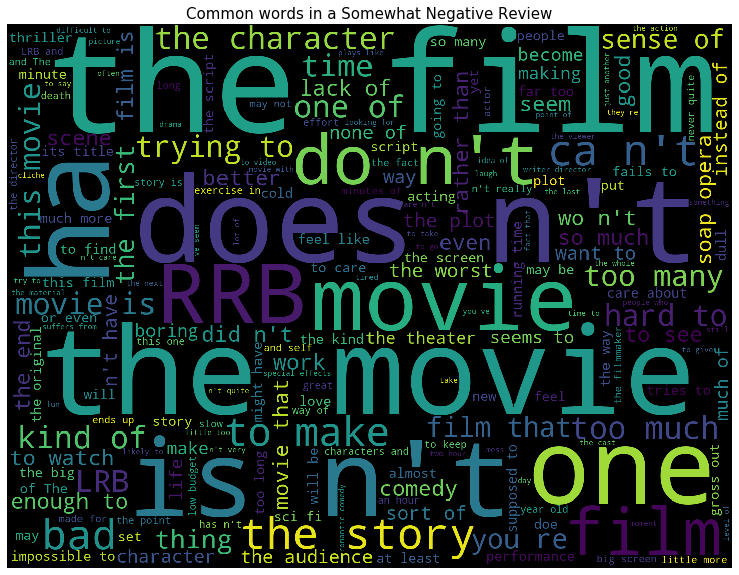

In [79]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(review1['Phrase'].astype(str)))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title("Common words in a Somewhat Negative Review", fontsize = 15)
plt.show()

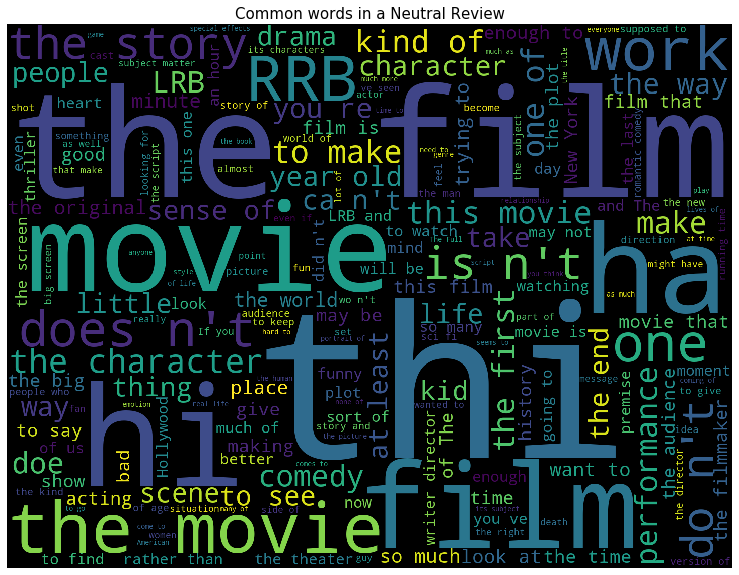

In [80]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(review2['Phrase'].astype(str)))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title("Common words in a Neutral Review", fontsize = 15)
plt.show()

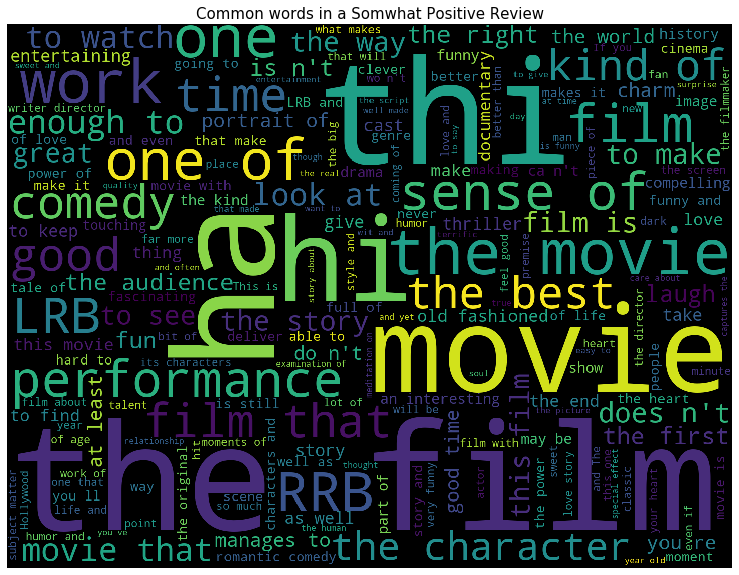

In [81]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(review3['Phrase'].astype(str)))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title("Common words in a Somwhat Positive Review", fontsize = 15)
plt.show()

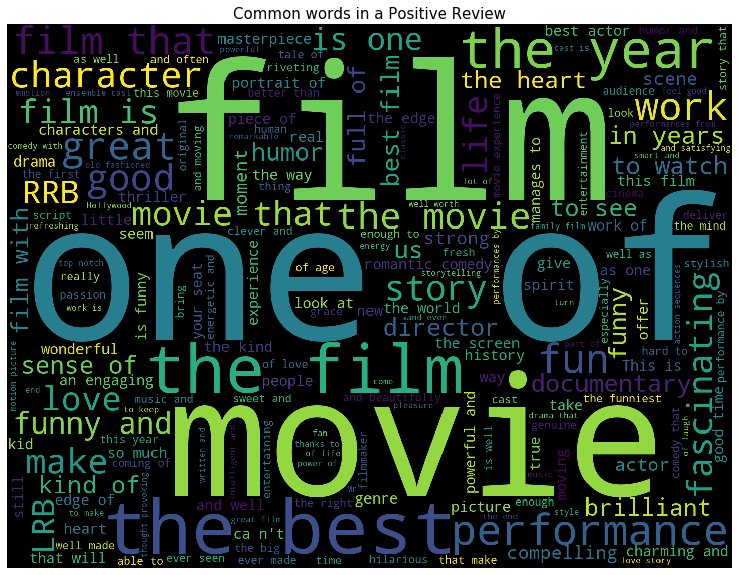

In [82]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(review4['Phrase'].astype(str)))
plt.figure(figsize=(16, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title("Common words in a Positive Review", fontsize = 15)
plt.show()

The word clouds give us a representation of the most common words and help us understand the format of our Phrases. We observe that:
    1. Removing stop words, punctuations will give us a better representation
    2. Words commonly associated with emotions are referred to in our data. 

# NRC EMOTIONAL LEXICON 

The NRC Emotion Lexicon is a list of English words and their associations with the following basic emotions:
    1. Anger
    2. Fear
    3. Anticipation
    4. Trust
    5. Surprise
    6. Sadness
    7. Joy
    8. Disgust
 
Each word in the database is associated with an emotion with a score of how strongly it relates to it. This will help to create new features for the sentiment analysis, since people tend to use more angry/sad words when they are writting a negative review, and more joyous word in a positive review. 

LINK: http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

In [6]:
df_train_data['anger'] = float(0)
df_train_data['anticipation'] = float(0)
df_train_data['disgust'] = float(0)
df_train_data['fear'] = float(0)
df_train_data['joy'] = float(0)
df_train_data['sadness'] = float(0)
df_train_data['surprise'] = float(0)
df_train_data['trust'] = float(0)
df_train_data['No. of Words'] = float(0)

df_test_data['anger'] = float(0)
df_test_data['anticipation'] = float(0)
df_test_data['disgust'] = float(0)
df_test_data['fear'] = float(0)
df_test_data['joy'] = float(0)
df_test_data['sadness'] = float(0)
df_test_data['surprise'] = float(0)
df_test_data['trust'] = float(0)
df_test_data['No. of Words'] = float(0)

In [7]:
anger = {}
anticipation = {}
disgust = {}
fear = {}
joy = {}
sadness = {}
surprise = {}
trust = {}

for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/anger-scores.txt"):
    row = line.split()
    anger[row[0]] = float(row[1])

for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/anticipation-scores.txt"):
    row = line.split()
    anticipation[row[0]] = float(row[1])

for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/disgust-scores.txt"):
    row = line.split()
    disgust[row[0]] = float(row[1])
    
for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/fear-scores.txt"):
    row = line.split()
    fear[row[0]] = float(row[1])
    
for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/joy-scores.txt"):
    row = line.split()
    joy[row[0]] = float(row[1])
    
for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/sadness-scores.txt"):
    row = line.split()
    sadness[row[0]] = float(row[1])
    
for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/surprise-scores.txt"):
    row = line.split()
    surprise[row[0]] = float(row[1])
    
for line in open("NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Intensity-Lexicon-v1/OneFilePerEmotion/trust-scores.txt"):
    row = line.split()
    trust[row[0]] = float(row[1])
    



# Feature Extraction

The following functions are to process the data and extract features from the phrases.

In [8]:
# Remove punctuation, stopwords from a text and lemmatize it. 
def lemmatizeText(words): 
    words1 = [x.translate(str.maketrans('', '', string.punctuation)) for x in words]
    stops = stopwords.words("english")
    wordList = [WordNetLemmatizer().lemmatize(str(x)) for x in words1 if not x in stops]
    return wordList

In [9]:
# Process a given string 
def changeString(string):
    string = " ".join(lemmatizeText(string.lower().split()))
    return string

# Process the dataframe for feature extraction 
def initialiseEmotion(df):
    strings = []
    for i, phrase in enumerate(df['Phrase']):
        for word in phrase.lower().split():
            if word in anger:
                df.at[i, 'anger'] += anger[word]

            if word in anticipation:
                df.at[i, 'anticipation'] += anticipation[word]

            if word in disgust:
                df.at[i, 'disgust'] += disgust[word]

            if word in fear:
                df.at[i, 'fear'] += fear[word]

            if word in joy:
                df.at[i, 'joy'] += joy[word]

            if word in sadness:
                df.at[i, 'sadness'] += sadness[word]

            if word in surprise:
                df.at[i, 'surprise'] += surprise[word]

            if word in trust:
                df.at[i, 'trust'] += trust[word]
                
        strings.append(changeString(phrase))
        
        if len(str(phrase).split()) > 0:
            df.at[i, 'No. of Words'] = np.log(len(str(phrase).split()))
        
    df['Lemmatized Words'] = pd.Series(strings)

In [10]:
initialiseEmotion(df_train_data)
initialiseEmotion(df_test_data)

See how the emotions relate to our data and check if the above prediction is correct

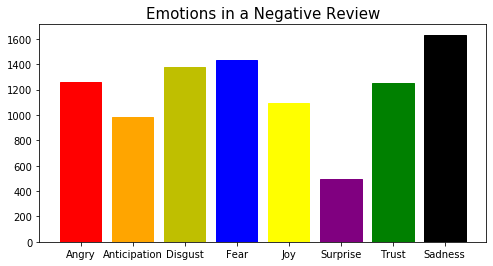

In [12]:
y_values = {}
y_values['Angry'] = df_train_data[df_train_data['Sentiment'] == 0]['anger'].sum()
y_values['Anticipation'] = df_train_data[df_train_data['Sentiment'] == 0]['anticipation'].sum()
y_values['Disgust'] = df_train_data[df_train_data['Sentiment'] == 0]['disgust'].sum()
y_values['Fear'] = df_train_data[df_train_data['Sentiment'] == 0]['fear'].sum()
y_values['Joy'] = df_train_data[df_train_data['Sentiment'] == 0]['joy'].sum()
y_values['Surprise'] = df_train_data[df_train_data['Sentiment'] == 0]['surprise'].sum()
y_values['Trust'] = df_train_data[df_train_data['Sentiment'] == 0]['trust'].sum()
y_values['Sadness'] = df_train_data[df_train_data['Sentiment'] == 0]['sadness'].sum()
plt.figure(figsize=(8, 4))
plot = plt.bar(range(len(y_values)), list(y_values.values()), align='center')
plot[0].set_color('red')
plot[1].set_color('orange')
plot[2].set_color('y')
plot[3].set_color('blue')
plot[4].set_color('yellow')
plot[5].set_color('purple')
plot[6].set_color('g')
plot[7].set_color('black')
plt.xticks(range(len(y_values)), list(y_values.keys()))
plt.title("Emotions in a Negative Review", fontsize = 15)
plt.show()

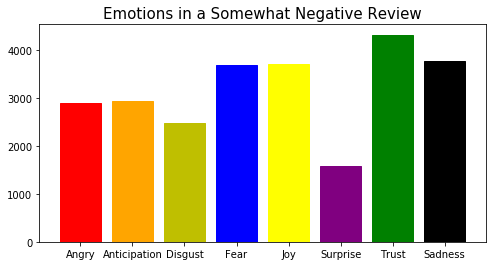

In [13]:
y_values = {}
y_values['Angry'] = df_train_data[df_train_data['Sentiment'] == 1]['anger'].sum()
y_values['Anticipation'] = df_train_data[df_train_data['Sentiment'] == 1]['anticipation'].sum()
y_values['Disgust'] = df_train_data[df_train_data['Sentiment'] == 1]['disgust'].sum()
y_values['Fear'] = df_train_data[df_train_data['Sentiment'] == 1]['fear'].sum()
y_values['Joy'] = df_train_data[df_train_data['Sentiment'] == 1]['joy'].sum()
y_values['Surprise'] = df_train_data[df_train_data['Sentiment'] == 1]['surprise'].sum()
y_values['Trust'] = df_train_data[df_train_data['Sentiment'] == 1]['trust'].sum()
y_values['Sadness'] = df_train_data[df_train_data['Sentiment'] == 1]['sadness'].sum()
plt.figure(figsize=(8, 4))
plot = plt.bar(range(len(y_values)), list(y_values.values()), align='center')
plot[0].set_color('red')
plot[1].set_color('orange')
plot[2].set_color('y')
plot[3].set_color('blue')
plot[4].set_color('yellow')
plot[5].set_color('purple')
plot[6].set_color('g')
plot[7].set_color('black')
plt.xticks(range(len(y_values)), list(y_values.keys()))
plt.title("Emotions in a Somewhat Negative Review", fontsize = 15)
plt.show()

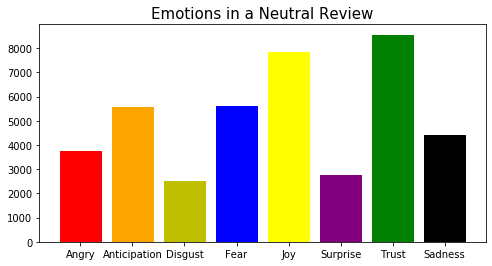

In [14]:
y_values = {}
y_values['Angry'] = df_train_data[df_train_data['Sentiment'] == 2]['anger'].sum()
y_values['Anticipation'] = df_train_data[df_train_data['Sentiment'] == 2]['anticipation'].sum()
y_values['Disgust'] = df_train_data[df_train_data['Sentiment'] == 2]['disgust'].sum()
y_values['Fear'] = df_train_data[df_train_data['Sentiment'] == 2]['fear'].sum()
y_values['Joy'] = df_train_data[df_train_data['Sentiment'] == 2]['joy'].sum()
y_values['Surprise'] = df_train_data[df_train_data['Sentiment'] == 2]['surprise'].sum()
y_values['Trust'] = df_train_data[df_train_data['Sentiment'] == 2]['trust'].sum()
y_values['Sadness'] = df_train_data[df_train_data['Sentiment'] == 2]['sadness'].sum()
plt.figure(figsize=(8, 4))
plot = plt.bar(range(len(y_values)), list(y_values.values()), align='center')
plot[0].set_color('red')
plot[1].set_color('orange')
plot[2].set_color('y')
plot[3].set_color('blue')
plot[4].set_color('yellow')
plot[5].set_color('purple')
plot[6].set_color('g')
plot[7].set_color('black')
plt.xticks(range(len(y_values)), list(y_values.keys()))
plt.title("Emotions in a Neutral Review", fontsize = 15)
plt.show()

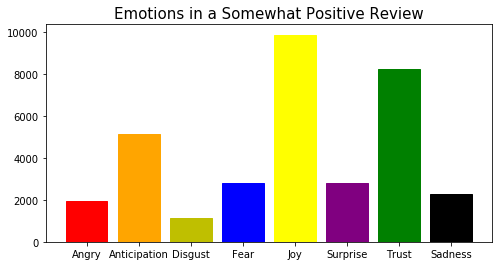

In [15]:
y_values = {}
y_values['Angry'] = df_train_data[df_train_data['Sentiment'] == 3]['anger'].sum()
y_values['Anticipation'] = df_train_data[df_train_data['Sentiment'] == 3]['anticipation'].sum()
y_values['Disgust'] = df_train_data[df_train_data['Sentiment'] == 3]['disgust'].sum()
y_values['Fear'] = df_train_data[df_train_data['Sentiment'] == 3]['fear'].sum()
y_values['Joy'] = df_train_data[df_train_data['Sentiment'] == 3]['joy'].sum()
y_values['Surprise'] = df_train_data[df_train_data['Sentiment'] == 3]['surprise'].sum()
y_values['Trust'] = df_train_data[df_train_data['Sentiment'] == 3]['trust'].sum()
y_values['Sadness'] = df_train_data[df_train_data['Sentiment'] == 3]['sadness'].sum()
plt.figure(figsize=(8, 4))
plot = plt.bar(range(len(y_values)), list(y_values.values()), align='center')
plot[0].set_color('red')
plot[1].set_color('orange')
plot[2].set_color('y')
plot[3].set_color('blue')
plot[4].set_color('yellow')
plot[5].set_color('purple')
plot[6].set_color('g')
plot[7].set_color('black')
plt.xticks(range(len(y_values)), list(y_values.keys()))
plt.title("Emotions in a Somewhat Positive Review", fontsize = 15)
plt.show()

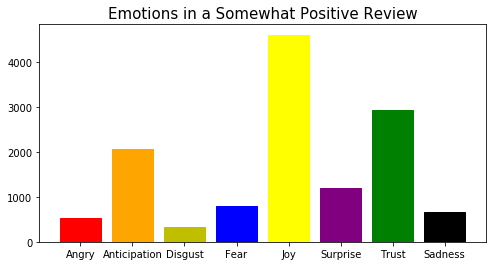

In [16]:
y_values = {}
y_values['Angry'] = df_train_data[df_train_data['Sentiment'] == 4]['anger'].sum()
y_values['Anticipation'] = df_train_data[df_train_data['Sentiment'] == 4]['anticipation'].sum()
y_values['Disgust'] = df_train_data[df_train_data['Sentiment'] == 4]['disgust'].sum()
y_values['Fear'] = df_train_data[df_train_data['Sentiment'] == 4]['fear'].sum()
y_values['Joy'] = df_train_data[df_train_data['Sentiment'] == 4]['joy'].sum()
y_values['Surprise'] = df_train_data[df_train_data['Sentiment'] == 4]['surprise'].sum()
y_values['Trust'] = df_train_data[df_train_data['Sentiment'] == 4]['trust'].sum()
y_values['Sadness'] = df_train_data[df_train_data['Sentiment'] == 4]['sadness'].sum()
plt.figure(figsize=(8, 4))
plot = plt.bar(range(len(y_values)), list(y_values.values()), align='center')
plot[0].set_color('red')
plot[1].set_color('orange')
plot[2].set_color('y')
plot[3].set_color('blue')
plot[4].set_color('yellow')
plot[5].set_color('purple')
plot[6].set_color('g')
plot[7].set_color('black')
plt.xticks(range(len(y_values)), list(y_values.keys()))
plt.title("Emotions in a Somewhat Positive Review", fontsize = 15)
plt.show()

# MODEL SELECTION

Since each model will have different advantages, we will apply few models to check their accuracy and choose the most appropriate for our data. To decrease computation time we will only consider about 100 features.

In [8]:
# Get a new mapper with the given number of words and the new features
def newMapper(count = None):
    mapper = DataFrameMapper([
        (['No. of Words', 'sadness', 'anger', 'disgust', 'anticipation', 'fear', 'joy', 'surprise', 'trust'], None),
        ('Lemmatized Words',CountVectorizer(analyzer = "word",min_df = 4, max_df = 0.9, max_features = count))
    ])
    return mapper

In [10]:
X1 = newMapper(100).fit_transform(df_train_data)
X_sparse1 = sp.sparse.csr_matrix(X1, dtype=np.int32)

In [11]:
models = []
scores = []
names = []

models.append(("K Neighbors", KNeighborsClassifier()))
models.append(("Multinomial Naive Bayes", MultinomialNB()))
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Decision Tree", DecisionTreeClassifier()))

x_train,x_test,y_train,y_test = train_test_split(X_sparse1, df_train_data['Sentiment'], train_size=0.8)

for name,model in models:
    model.fit(x_train,y_train)
    names.append(name)
    scores.append(accuracy_score(model.predict(x_test),y_test))

for i in range(len(names)):
    print(names[i],scores[i])

/Users/arshdeepbhogal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


K Neighbors 0.5308214789183647
Multinomial Naive Bayes 0.5278738946559016
Logistic Regression 0.5332884787902089
Decision Tree 0.5526079712930924


~The warning for the Logistic Regressor signifies that our model failed to converge with the given number of iterations. If we try to increase the iterations the model might overfit or even fail to converge. So it would not be a good fit.

~ All of the models show similar results. This means we can move to a more somplex, sophisticated model like SVM, Random Forest. This would give us more accuracy.

**SVM are very expensive to train in higher dimension, we will stick to Random Forest.**

In [39]:
mapp = newMapper()
X = mapp.fit_transform(df_train_data)
X_sparse = sp.sparse.csr_matrix(X, dtype=np.int32)

A quick check to see how does the TfidVectorizer performs on the data with a basic model

In [21]:
vectorizer = TfidfVectorizer()
dataX = vectorizer.fit_transform(df_train_data['Lemmatized Words'])
x_train,x_test,y_train,y_test = train_test_split(dataX, df_train_data['Sentiment'], train_size=0.8)
model = MultinomialNB()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("*"*100)
print(classification_report(predictions,y_test))
print("*"*100)
print("Accuracy Score ", accuracy_score(predictions,y_test))
print("*"*100)

****************************************************************************************************
              precision    recall  f1-score   support

           0       0.05      0.57      0.09       120
           1       0.27      0.50      0.35      2940
           2       0.89      0.61      0.72     23079
           3       0.40      0.54      0.46      4855
           4       0.07      0.58      0.13       218

    accuracy                           0.59     31212
   macro avg       0.33      0.56      0.35     31212
weighted avg       0.74      0.59      0.64     31212

****************************************************************************************************
Accuracy Score  0.5867935409457901
****************************************************************************************************


# HYPER PARAMETER TUNING
Randomize Search CV selects the best combination of parameters from a given list of parameters. It also applies cross validation to make sure the parameters give an accurate result accross all range of dataset.
To decrease computation time, we train it on about randomly chosen 15000 Phrases.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_sparse, df_train_data['Sentiment'], train_size=0.1)

grid = {'bootstrap': [True, False],
               'max_depth': [100, 140, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [8, 12, 10],
               'n_estimators': [100, 115, 130, 150],
                'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = grid, verbose=4, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:  4.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [14]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

The combination of parameters is now used to train a model on 80% of the training set and test it's accuracy. 

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X_sparse, df_train_data['Sentiment'], train_size=0.8)

In [47]:
model = RandomForestClassifier(n_estimators=150,verbose=5,min_samples_split=10, 
                               min_samples_leaf=1,max_features='auto',max_depth=None,
                               bootstrap=False,criterion='entropy')


In [45]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
predictions = model.predict(x_test)
print("*"*100)
print(classification_report(predictions,y_test))
print("*"*100)
print("Accuracy Score ", accuracy_score(predictions,y_test))
print("*"*100)

****************************************************************************************************
              precision    recall  f1-score   support

           0       0.37      0.46      0.41      1110
           1       0.48      0.54      0.51      4874
           2       0.79      0.71      0.75     17609
           3       0.50      0.55      0.53      6079
           4       0.40      0.50      0.44      1540

    accuracy                           0.63     31212
   macro avg       0.51      0.55      0.53     31212
weighted avg       0.65      0.63      0.64     31212

****************************************************************************************************
Accuracy Score  0.6339869281045751
****************************************************************************************************


This is fairly good, when compared to the challenges we face in text Sentiment Analysis like:
    1. Sarcasm can't be mapped
    2. Negation handling
    3. Inverted word order 
    4. Multiple attitudes
    5. Unique names and many more!!

# Kaggle Submission

The following code is to run the model on the test data set and exporting the result to a CSV file.

In [41]:
Y = mapp.transform(df_test_data)
Y_sparse = sp.sparse.csr_matrix(Y, dtype=np.int32)

In [42]:
model.fit(X_sparse, df_train_data['Sentiment'])
predictions = model.predict(Y_sparse)
test = pd.DataFrame()
test['PhraseId'] = df_test_data['PhraseId']
test['Sentiment'] = predictions
test.to_csv('simple_sub.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 150


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 150


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


building tree 3 of 150


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.1s remaining:    0.0s


building tree 4 of 150


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.9s remaining:    0.0s


building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.4min finished
